In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2.0

In [54]:
def forward_difference(func, x, h, dtype):
    return (func(x + h, dtype=dtype) - func(x, dtype=dtype)) / h

def central_difference(func, x, h, dtype):
    return (func(x + h, dtype=dtype) - func(x - h, dtype=dtype)) / (2*h)

def extrapolated_difference(func, x, h, dtype):
    f1 = lambda x,h: (func(x + h, dtype=dtype) - func(x - h, dtype=dtype)) / (2*h)
    f2 = lambda x,h: (func(x + 2*h, dtype=dtype) - func(x - 2*h, dtype=dtype)) / (4*h)
    return (4*f1(x,h) - f2(x,h)) / 3

def total_error_true(h,x,func,method):
    if func=='cos':
        if method=='forward':
            return np.abs(-np.sin(x, dtype=np.float32) - forward_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
        if method=='central':
            return np.abs(-np.sin(x, dtype=np.float32) - central_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
        if method=='extrapolated':
            return np.abs(-np.sin(x, dtype=np.float32) - extrapolated_difference(np.cos, x, h, dtype=np.float32), dtype=np.float32)
    if func=='exp':
        if method=='forward':
            return np.abs(np.exp(x, dtype=np.float32) - forward_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)
        if method=='central':
            return np.abs(np.exp(x, dtype=np.float32) - central_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)
        if method=='extrapolated':
            return np.abs(np.exp(x, dtype=np.float32) - extrapolated_difference(np.exp, x, h, dtype=np.float32), dtype=np.float32)

def total_error(h,x,func,method):
    machine_error = np.float32(1e-7)
    if func=='cos':
        if method=='forward':
            return h*(np.abs(-np.cos(x, dtype=np.float32), dtype=np.float32))/2 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
        if method=='central':
            return (h**2)*(np.abs(np.sin(x, dtype=np.float32), dtype=np.float32))/6 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
        if method=='extrapolated':
            return (h**4)*(np.abs(-np.sin(x, dtype=np.float32), dtype=np.float32))*3/120 + machine_error*(np.abs(np.cos(x, dtype=np.float32), dtype=np.float32)/h)
    if func=='exp':
        if method=='forward':
            return h*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))/2 + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h
        if method=='central':
            return (h**2)*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))/6 + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h
        if method=='extrapolated':
            return (h**4)*(np.abs(np.exp(x, dtype=np.float32), dtype=np.float32))*(3/120) + machine_error*np.abs(np.exp(x, dtype=np.float32), dtype=np.float32)/h

In [55]:
print(f'Using Forward Difference, the derivative of cos(x) at x = 0.1 is {forward_difference(np.cos, 0.1, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32)}')
print(f'Using Central Difference, the derivative of cos(x) at x = 0.1 is {central_difference(np.cos, 0.1, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32)}')
print(f'Using Extrapolated Difference, the derivative of cos(x) at x = 0.1 is {extrapolated_difference(np.cos, 0.1, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32)}')

print(f'Using Forward Difference, the derivative of cos(x) at x = 10 is {forward_difference(np.cos, 10, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32)}')
print(f'Using Central Difference, the derivative of cos(x) at x = 10 is {central_difference(np.cos, 10, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32)}')
print(f'Using Extrapolated Difference, the derivative of cos(x) at x = 10 is {extrapolated_difference(np.cos, 10, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32)}')

print("\n")

print(f'The true value of the derivative of cos(x) at x = 0.1 is {-np.sin(0.1,dtype=np.float32)}')
print(f'The true value of the derivative of cos(x) at x = 10 is {-np.sin(10,dtype=np.float32)}')

print("\n###############################################################################################################\n")

print(f'Using Forward Difference, the derivative of exp(x) at x = 0.1 is {forward_difference(np.exp, 0.1, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32)}')
print(f'Using Central Difference, the derivative of exp(x) at x = 0.1 is {central_difference(np.exp, 0.1, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32)}')
print(f'Using Extrapolated Difference, the derivative of exp(x) at x = 0.1 is {extrapolated_difference(np.exp, 0.1, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32)}')

print(f'Using Forward Difference, the derivative of exp(x) at x = 10 is {forward_difference(np.exp, 10, h=np.sqrt(1e-7, dtype=np.float32), dtype=np.float32)}')
print(f'Using Central Difference, the derivative of exp(x) at x = 10 is {central_difference(np.exp, 10, h=np.power(1e-7, 2/3, dtype=np.float32), dtype=np.float32)}')
print(f'Using Extrapolated Difference, the derivative of exp(x) at x = 10 is {extrapolated_difference(np.exp, 10, h=np.power(1e-7, 3/5, dtype=np.float32), dtype=np.float32)}')

print("\n")

print(f'The true value of the derivative of exp(x) at x = 0.1 is {np.exp(0.1,dtype=np.float32)}')
print(f'The true value of the derivative of exp(x) at x = 10 is {np.exp(10,dtype=np.float32)}')

Using Forward Difference, the derivative of cos(x) at x = 0.1 is -0.10008630156517029
Using Central Difference, the derivative of cos(x) at x = 0.1 is -0.09959772229194641
Using Extrapolated Difference, the derivative of cos(x) at x = 0.1 is -0.09958400577306747
Using Forward Difference, the derivative of cos(x) at x = 10 is 0.5447258353233337
Using Central Difference, the derivative of cos(x) at x = 10 is 0.5547040104866028
Using Extrapolated Difference, the derivative of cos(x) at x = 10 is 0.5427131056785583


The true value of the derivative of cos(x) at x = 0.1 is -0.0998334214091301
The true value of the derivative of cos(x) at x = 10 is 0.5440210700035095

###############################################################################################################

Using Forward Difference, the derivative of exp(x) at x = 0.1 is 1.1052844524383545
Using Central Difference, the derivative of exp(x) at x = 0.1 is 1.1038748025894165
Using Extrapolated Difference, the derivative o

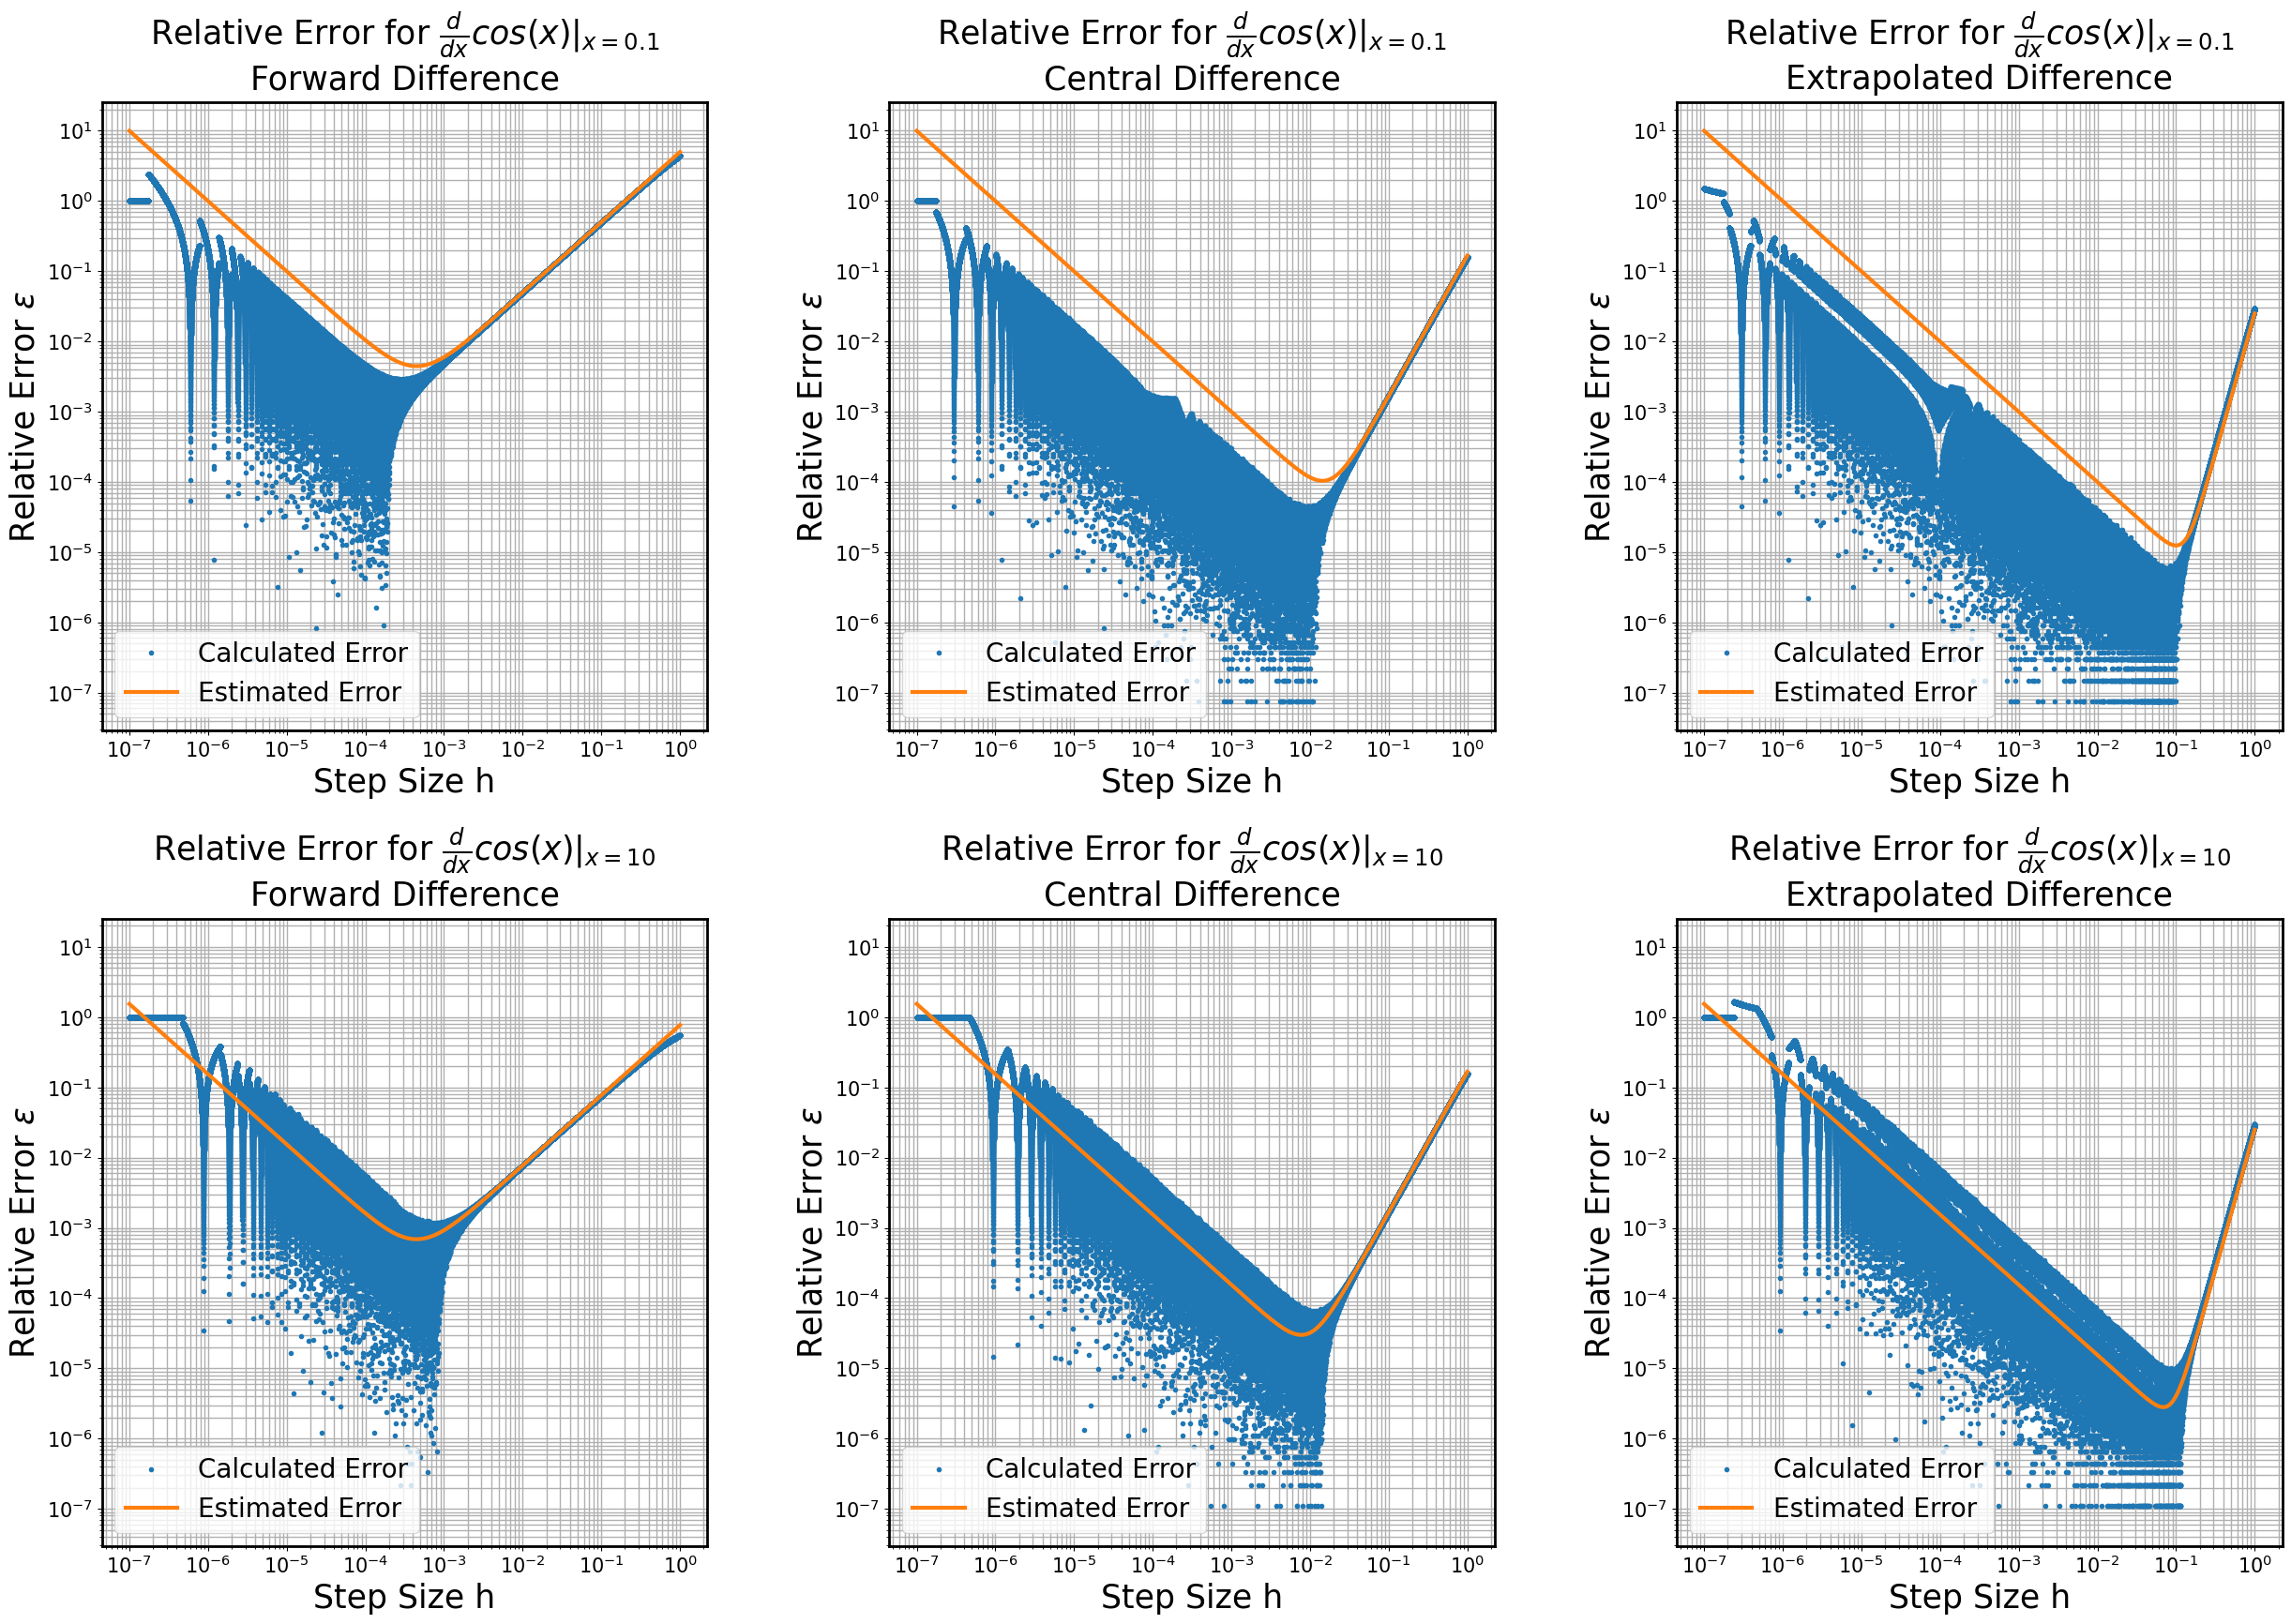

<Figure size 800x600 with 0 Axes>

In [56]:
h_array = np.logspace(-7,0,int(1e5),dtype=np.float32)

fig, ax = plt.subplots(2,3,figsize=(30, 20),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.figure(figsize=(8,6),dpi=100)

ax[0][0].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'forward')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][0].loglog(h_array,total_error(h_array, 0.1, 'cos', 'forward')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][0].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nForward Difference',fontsize=25,pad=10)

ax[0][1].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'central')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][1].loglog(h_array,total_error(h_array, 0.1, 'cos', 'central')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][1].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nCentral Difference',fontsize=25,pad=10)

ax[0][2].loglog(h_array,total_error_true(h_array, 0.1, 'cos', 'extrapolated')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][2].loglog(h_array,total_error(h_array, 0.1, 'cos', 'extrapolated')/np.abs(-np.sin(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][2].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=0.1}$'+ '\nExtrapolated Difference',fontsize=25,pad=10)

ax[1][0].loglog(h_array,total_error_true(h_array, 10, 'cos', 'forward')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][0].loglog(h_array,total_error(h_array, 10, 'cos', 'forward')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][0].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nForward Difference',fontsize=25,pad=10)

ax[1][1].loglog(h_array,total_error_true(h_array, 10, 'cos', 'central')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][1].loglog(h_array,total_error(h_array, 10, 'cos', 'central')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][1].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nCentral Difference',fontsize=25,pad=10)

ax[1][2].loglog(h_array,total_error_true(h_array, 10, 'cos', 'extrapolated')/np.abs(-np.sin(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][2].loglog(h_array,total_error(h_array, 10, 'cos', 'extrapolated')/np.abs(-np.sin(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][2].set_title(r'Relative Error for $\frac{d}{dx} cos(x)|_{x=10}$'+ '\nExtrapolated Difference',fontsize=25,pad=10)

for i in range(2):
    for j in range(3):
        ax[i][j].grid(True,which='both',lw=1)
        ax[i][j].set_xlabel('Step Size h',fontsize=25)
        ax[i][j].set_ylabel(r'Relative Error $\epsilon$',fontsize=25)  
        ax[i][j].legend(fontsize=20,loc='lower left')
        ax[i][j].tick_params(labelbottom=True)
        ax[i][j].tick_params(labelleft=True)
        ax[i][j].tick_params(axis='x', labelsize=15)
        ax[i][j].tick_params(axis='y', labelsize=15)

fig.savefig('./hw1_p1_relative_error_cos.png')
plt.show()

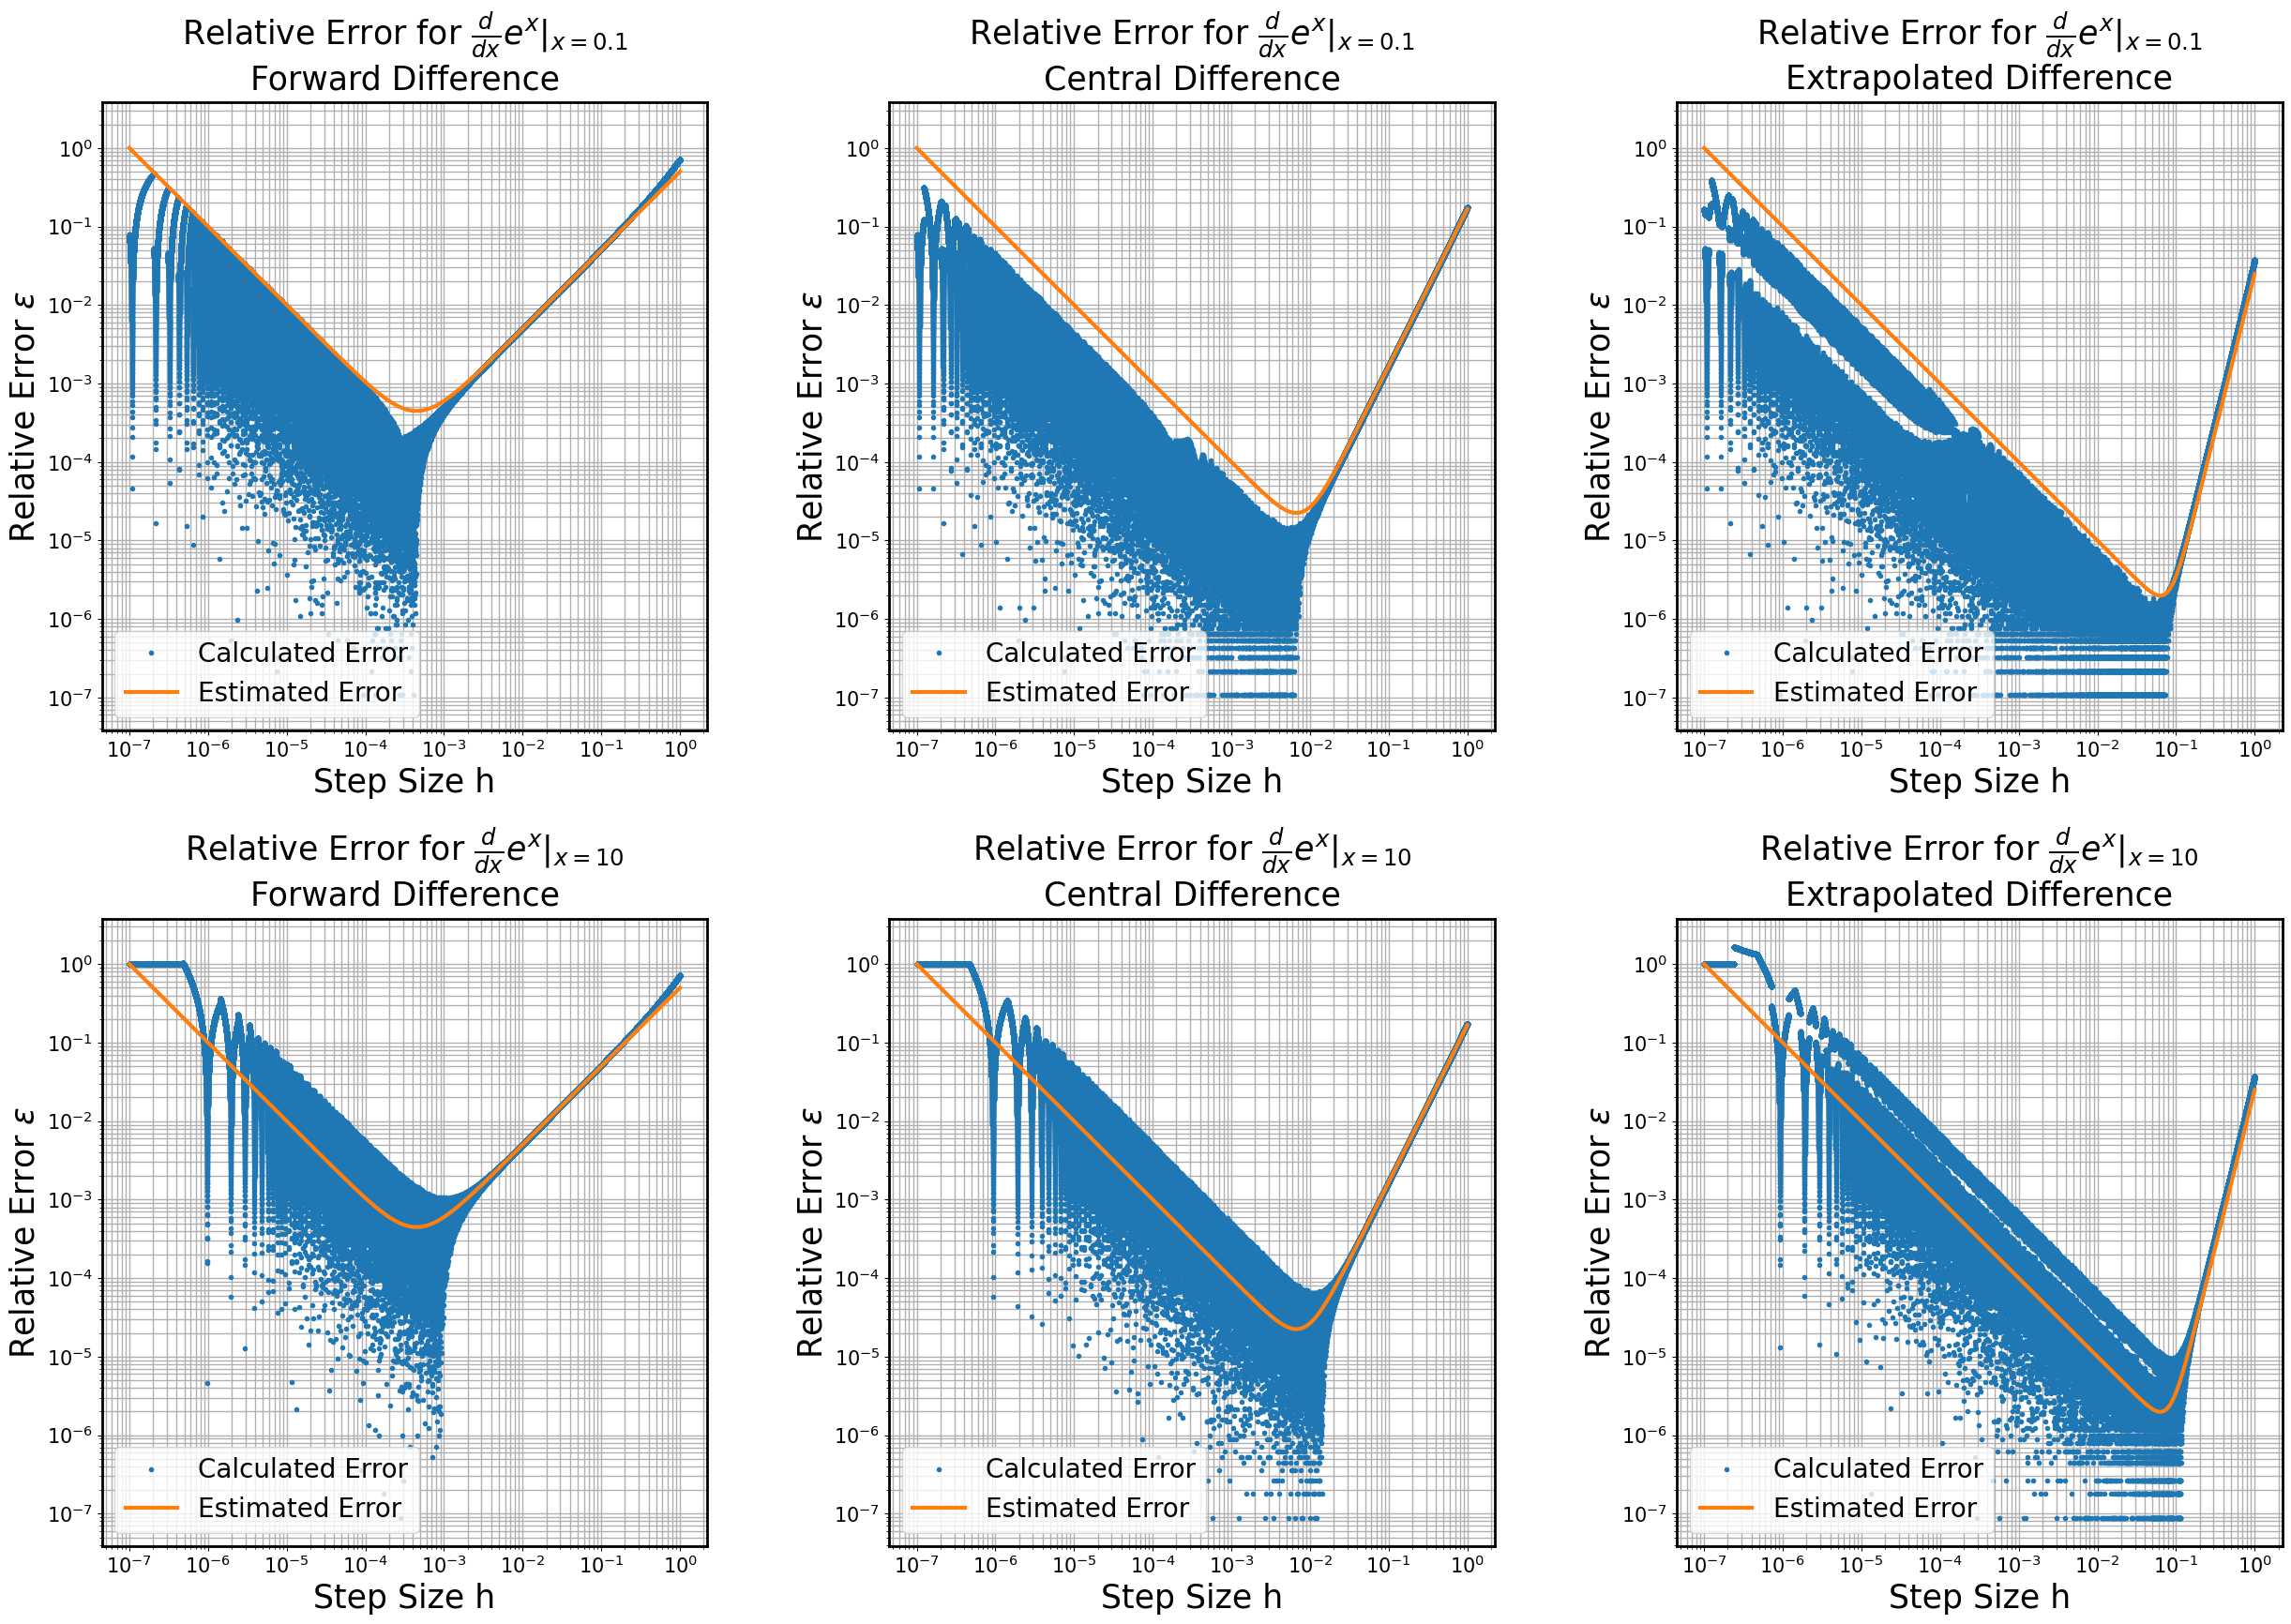

<Figure size 800x600 with 0 Axes>

In [57]:
fig, ax = plt.subplots(2,3,figsize=(30, 20),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.figure(figsize=(8,6),dpi=100)
ax[0][0].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'forward')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][0].loglog(h_array,total_error(h_array, 0.1, 'exp', 'forward')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][0].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nForward Difference',fontsize=25,pad=10)

ax[0][1].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'central')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][1].loglog(h_array,total_error(h_array, 0.1, 'exp', 'central')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][1].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nCentral Difference',fontsize=25,pad=10)

ax[0][2].loglog(h_array,total_error_true(h_array, 0.1, 'exp', 'extrapolated')/np.abs(np.exp(0.1,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[0][2].loglog(h_array,total_error(h_array, 0.1, 'exp', 'extrapolated')/np.abs(np.exp(0.1,dtype=np.float32)),label='Estimated Error',lw=3)
ax[0][2].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=0.1}$'+ '\nExtrapolated Difference',fontsize=25,pad=10)

ax[1][0].loglog(h_array,total_error_true(h_array, 10, 'exp', 'forward')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][0].loglog(h_array,total_error(h_array, 10, 'exp', 'forward')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][0].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nForward Difference',fontsize=25,pad=10)

ax[1][1].loglog(h_array,total_error_true(h_array, 10, 'exp', 'central')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][1].loglog(h_array,total_error(h_array, 10, 'exp', 'central')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][1].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nCentral Difference',fontsize=25,pad=10)

ax[1][2].loglog(h_array,total_error_true(h_array, 10, 'exp', 'extrapolated')/np.abs(np.exp(10,dtype=np.float32)),label='Calculated Error',linestyle='',marker='.')
ax[1][2].loglog(h_array,total_error(h_array, 10, 'exp', 'extrapolated')/np.abs(np.exp(10,dtype=np.float32)),label='Estimated Error',lw=3)
ax[1][2].set_title(r'Relative Error for $\frac{d}{dx} e^{x}|_{x=10}$'+ '\nExtrapolated Difference',fontsize=25,pad=10)

for i in range(2):
    for j in range(3):
        ax[i][j].grid(True,which='both',lw=1)
        ax[i][j].set_xlabel('Step Size h',fontsize=25)
        ax[i][j].set_ylabel(r'Relative Error $\epsilon$',fontsize=25)  
        ax[i][j].legend(fontsize=20,loc='lower left')
        ax[i][j].tick_params(labelbottom=True)
        ax[i][j].tick_params(labelleft=True)
        ax[i][j].tick_params(axis='x', labelsize=15)
        ax[i][j].tick_params(axis='y', labelsize=15)

fig.savefig('./hw1_p1_relative_error_exp.png')